### LATER

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

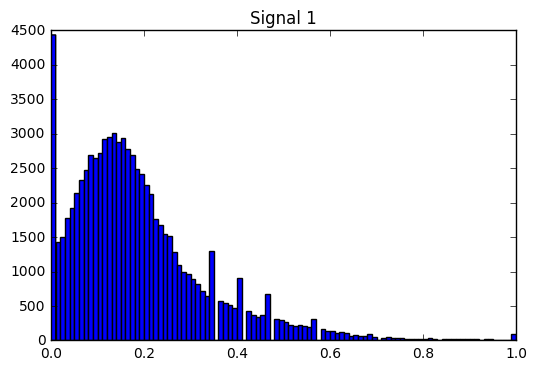

In [8]:
plt.hist(sig1, bins = 100)
plt.title("Signal 1")
plt.show()

In [9]:
rel_count = 0
total_count = 0
for i in range(n):
    if sig6[i] == 0:
        total_count += 1
        if relevance[i] == 1:
            rel_count += 1

In [10]:
print rel_count
print total_count 
print float(rel_count) / total_count

19212
52165
0.368292916707


In [11]:
1 - float(rel_count) / total_count

0.631707083293396

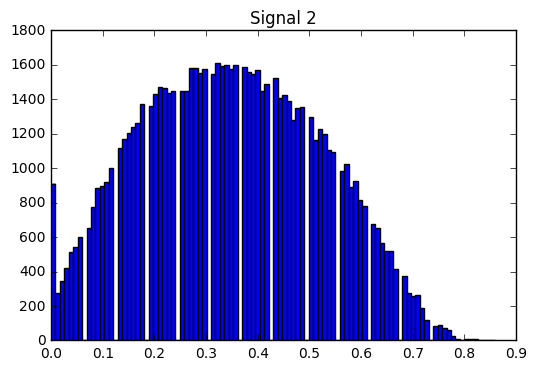

In [12]:
plt.hist(sig2, bins = 100)
plt.title("Signal 2")
plt.show()

In [13]:
for i in range(n):
    if sig3[i] != 0:
        sig3[i] = math.log(sig3[i])
    else:
        sig3[i] = math.log(0.8)

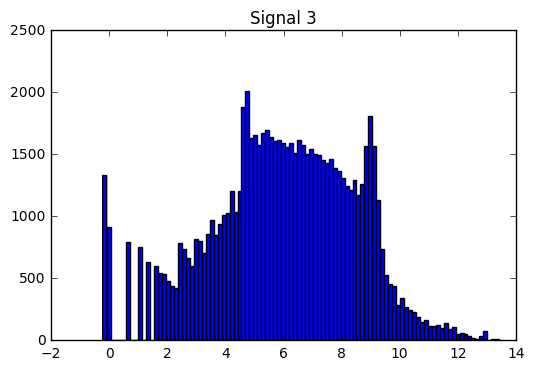

In [14]:
plt.hist(sig3, bins = 100)
plt.title("Signal 3")
plt.show()

In [15]:
for i in range(n):
    if sig4[i] != 0:
        sig4[i] = math.log(sig4[i])
    else:
        sig3[i] = math.log(0.8)

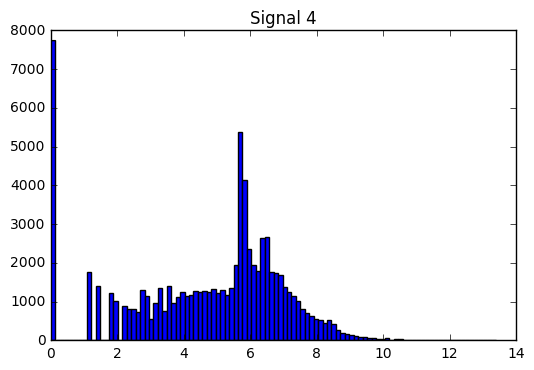

In [16]:
plt.hist(sig4, bins = 100)
plt.title("Signal 4")
plt.show()

In [17]:
for i in range(n):
    if sig5[i] != 0:
        sig5[i] = math.log(sig5[i])
    else:
        sig3[i] = math.log(0.8)

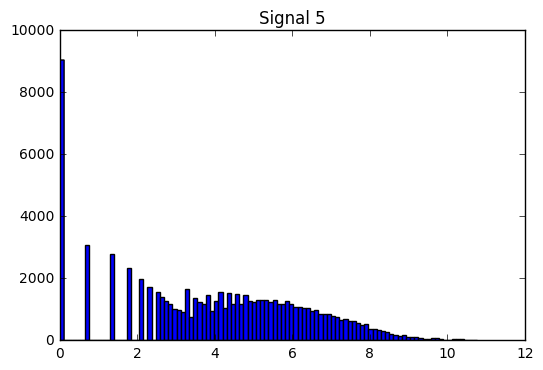

In [18]:
plt.hist(sig5, bins = 100)
plt.title("Signal 5")
plt.show()

In [19]:
new_sig6 = []
for i in range(n):
    if sig6[i] < 20:
        new_sig6.append(sig6[i])

In [20]:
for i in range(n):
    if sig6[i] != 0:
        sig6[i] = math.log(sig6[i])
    else:
        sig3[i] = math.log(0.8)

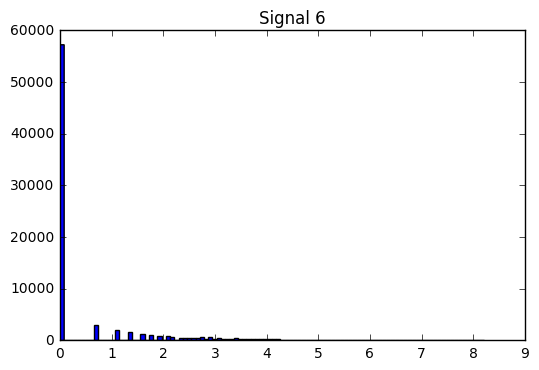

In [21]:
plt.hist(sig6, bins = 100)
plt.title("Signal 6")
plt.show()

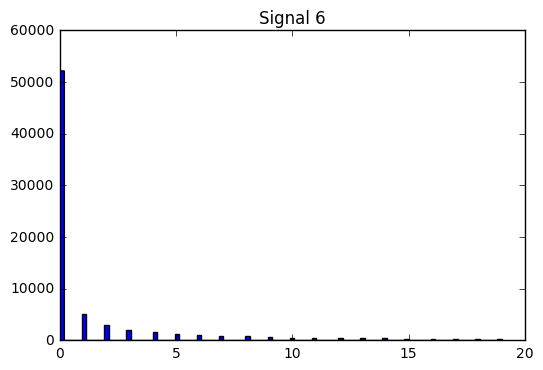

In [22]:
plt.hist(new_sig6, bins = 100)
plt.title("Signal 6")
plt.show()

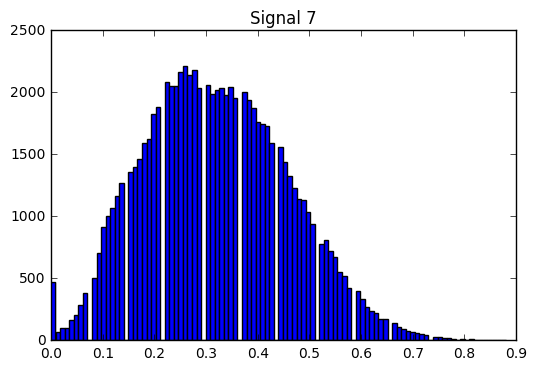

In [23]:
plt.hist(sig7, bins = 100)
plt.title("Signal 7")
plt.show()

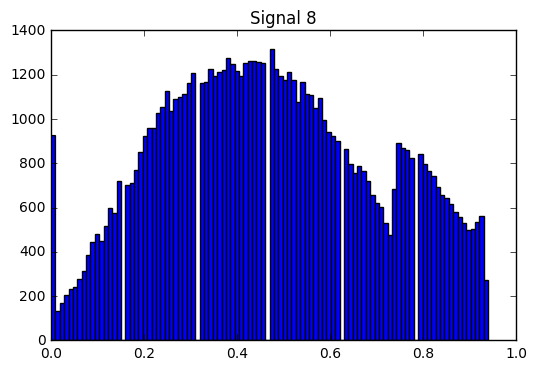

In [24]:
plt.hist(sig8, bins = 100)
plt.title("Signal 8")
plt.show()

### Data Checking

In [369]:
new_sig6 = []
count_rel = 0
for i in range(n):
    if sig6[i] > 500:
        new_sig6.append(1)
        if relevance[i] == 1:
            count_rel += 1
    else:
        new_sig6.append(0)

IndexError: list index out of range

In [239]:
num_ext_4 = 0
num_right = 0
for i in range(n):
    if sig4[i] > 1.5e5:
        num_ext_4 += 1
        if relevance[i] == 1:
            num_right += 1

In [240]:
print float(num_right) / num_ext_4
print num_right

0.75
9


In [245]:
num_ext_5 = 0
num_right = 0
for i in range(n):
    if sig5[i] > 35000:
        num_ext_5 += 1
        if relevance[i] == 1:
            num_right += 1

In [246]:
print float(num_right) / num_ext_5
print num_right

0.909090909091
10


In [249]:
num_ext_3 = 0
num_right = 0
for i in range(n):
    if sig3[i] > 6e5:
        num_ext_3 += 1
        if relevance[i] == 1:
            num_right += 1

In [250]:
print float(num_right) / num_ext_3
print num_right

0.555555555556
5


In [186]:
print count_rel
print sum(new_sig6)
print float(count_rel) / sum(new_sig6)

339
353
0.960339943343


In [57]:
len(new_sig6)

80046

### START HERE

In [1]:
import math

In [2]:
import csv
import numpy as np
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split

In [3]:
query_lengths = []
is_homepage = []
sig1 = []
sig2 = []
sig3 = []
sig4 = []
sig5 = []
sig6 = []
sig7 = []
sig8 = []
relevance = []

In [4]:
query_id = []
url_id = []

In [5]:
with open('training.csv', 'rb') as csvfile:
    reader = csv.DictReader(csvfile)
   
    for row in reader:
        
        query_lengths.append(int(row['query_length']))
        is_homepage.append(int(row['is_homepage']))
        sig1.append(float(row['sig1']))
        sig2.append(float(row['sig2']))
        sig3.append(float(row['sig3']))
        
        sig4.append(float(row['sig4']))
        sig5.append(float(row['sig5']))
        sig6.append(float(row['sig6']))
        sig7.append(float(row['sig7']))
        sig8.append(float(row['sig8']))
        
        relevance.append(int(row['relevance']))
        
        query_id.append(int(row['query_id']))
        url_id.append(int(row['url_id']))
        

In [6]:
n = len(url_id)
print n

80046


### EXECUTE ABOVE

In [25]:
len(url_id)

80046

In [26]:
total = len(sig8) # 80046
tenth = total/10

In [27]:
fold1 = tenth + 1
fold2 = fold1 + tenth + 8
fold3 = fold2 + tenth + 1
fold4 = fold3 + tenth + 8
fold5 = fold4 + tenth + 3
fold6 = fold5 + tenth + 6
fold7 = fold6 + tenth + 3
fold8 = fold7 + tenth + 1
fold9 = fold8 + tenth + 4
fold10 = total - 1 

In [28]:
fold_indices = [0, fold1, fold2, fold3, fold4, fold5, fold6, fold7, fold8, fold9, fold10]

In [29]:
len(fold_indices)

11

In [30]:
query_lengths = np.array(query_lengths)
is_homepage = np.array(is_homepage)
sig1 = np.array(sig1)
sig2 = np.array(sig2)
sig3 = np.array(sig3)
sig4 = np.array(sig4)
sig5 = np.array(sig5)
sig6 = np.array(sig6)
sig7 = np.array(sig7)
sig8 = np.array(sig8)
relevance = np.array(relevance)

In [31]:
np.mean(sig1)

0.18324013692127025

In [32]:
query_lengths_1 = []
query_lengths_2 = []
query_lengths_3 = []
query_lengths_4 = []
query_lengths_5 = []
query_lengths_6 = []
query_lengths_7 = []
query_lengths_8 = []
query_lengths_large = []

n = len(query_lengths)
for i in range(n):
    if query_lengths[i] == 1:
        query_lengths_1.append(1)
        query_lengths_2.append(0)
        query_lengths_3.append(0)
        query_lengths_4.append(0)
        query_lengths_5.append(0)
        query_lengths_6.append(0)
        query_lengths_7.append(0)
        query_lengths_8.append(0)
        query_lengths_large.append(0)

    elif query_lengths[i] == 2:
        query_lengths_1.append(0)
        query_lengths_2.append(1)
        query_lengths_3.append(0)
        query_lengths_4.append(0)
        query_lengths_5.append(0)
        query_lengths_6.append(0)
        query_lengths_7.append(0)
        query_lengths_8.append(0)
        query_lengths_large.append(0)
        
    elif query_lengths[i] == 3:
        query_lengths_1.append(0)
        query_lengths_2.append(0)
        query_lengths_3.append(1)
        query_lengths_4.append(0)
        query_lengths_5.append(0)
        query_lengths_6.append(0)
        query_lengths_7.append(0)
        query_lengths_8.append(0)
        query_lengths_large.append(0)
        
    elif query_lengths[i] == 4:
        query_lengths_1.append(0)
        query_lengths_2.append(0)
        query_lengths_3.append(0)
        query_lengths_4.append(1)
        query_lengths_5.append(0)
        query_lengths_6.append(0)
        query_lengths_7.append(0)
        query_lengths_8.append(0)
        query_lengths_large.append(0)
    
    elif query_lengths[i] == 5:
        query_lengths_1.append(0)
        query_lengths_2.append(0)
        query_lengths_3.append(0)
        query_lengths_4.append(0)
        query_lengths_5.append(1)
        query_lengths_6.append(0)
        query_lengths_7.append(0)
        query_lengths_8.append(0)
        query_lengths_large.append(0)
        
    elif query_lengths[i] == 6:
        query_lengths_1.append(0)
        query_lengths_2.append(0)
        query_lengths_3.append(0)
        query_lengths_4.append(0)
        query_lengths_5.append(0)
        query_lengths_6.append(1)
        query_lengths_7.append(0)
        query_lengths_8.append(0)
        query_lengths_large.append(0)
        
    elif query_lengths[i] == 7:
        query_lengths_1.append(0)
        query_lengths_2.append(0)
        query_lengths_3.append(0)
        query_lengths_4.append(0)
        query_lengths_5.append(0)
        query_lengths_6.append(0)
        query_lengths_7.append(1)
        query_lengths_8.append(0)
        query_lengths_large.append(0)
        
    elif query_lengths[i] == 8:
        query_lengths_1.append(0)
        query_lengths_2.append(0)
        query_lengths_3.append(0)
        query_lengths_4.append(0)
        query_lengths_5.append(0)
        query_lengths_6.append(0)
        query_lengths_7.append(0)
        query_lengths_8.append(1)
        query_lengths_large.append(0)
        
    else:
        query_lengths_1.append(0)
        query_lengths_2.append(0)
        query_lengths_3.append(0)
        query_lengths_4.append(0)
        query_lengths_5.append(0)
        query_lengths_6.append(0)
        query_lengths_7.append(0)
        query_lengths_8.append(0)
        query_lengths_large.append(1)

In [33]:
# sig1_sq = []
# sig2_sq = []
# sig7_sq = []
# sig8_sq = []

# for i in range(n):
#     sig1[i] = math.exp(sig1[i])
#     sig2[i] = math.exp(sig2[i])
#     sig7[i] = math.exp(sig7[i])
#     sig8[i] = math.exp(sig8[i])

In [34]:
from sklearn.decomposition import PCA

In [40]:
n = 80046

In [41]:
i = 0
start_ind = i
current_query_id = query_id[start_ind]
rank = []
count = []
temp_order = []
order_ind = 0

while i < n:
    i += 1
    order_ind += 1
    temp_order.append(order_ind)
    
    if i == n:
        end_ind = i
        num_loops = end_ind - start_ind 
        for j in range(num_loops):
            count.append(num_loops)
            rank.append(temp_order[j])
            
    elif query_id[i] == current_query_id:
        continue
        
    else:
        end_ind = i
        num_loops = end_ind - start_ind 
        for j in range(num_loops):
            count.append(num_loops)
            rank.append(temp_order[j])
        
        start_ind = end_ind
        current_query_id = query_id[start_ind]
        order_ind = 0
        temp_order = []

In [35]:
# could add quartiles

In [35]:
i = 0
start_ind = i
current_query_id = query_id[start_ind]
avg_sig1 = []
avg_sig2 = []
avg_sig3 = []
avg_sig4 = []
avg_sig5 = []
avg_sig6 = []
avg_sig7 = []
avg_sig8 = []

sig1_0 = []
sig2_0 = []
sig3_0 = []
sig4_0 = []
sig5_0 = []
sig6_0 = []
sig7_0 = []
sig8_0 = []

sig1_25 = []
sig2_25 = []
sig3_25 = []
sig4_25 = []
sig5_25 = []
sig6_25 = []
sig7_25 = []
sig8_25 = []

sig1_50 = []
sig2_50 = []
sig3_50 = []
sig4_50 = []
sig5_50 = []
sig6_50 = []
sig7_50 = []
sig8_50 = []

sig1_75 = []
sig2_75 = []
sig3_75 = []
sig4_75 = []
sig5_75 = []
sig6_75 = []
sig7_75 = []
sig8_75 = []

sig1_100 = []
sig2_100 = []
sig3_100 = []
sig4_100 = []
sig5_100 = []
sig6_100 = []
sig7_100 = []
sig8_100 = []


sig1_temp = []
sig2_temp = []
sig3_temp = []
sig4_temp = []
sig5_temp = []
sig6_temp = []
sig7_temp = []
sig8_temp = []

while i < n:
    if i == (n-1):
        end_ind = i
        num_loops = end_ind - start_ind + 1
        
        sig1_temp.append(sig1[i])
        sig2_temp.append(sig2[i])
        sig3_temp.append(sig3[i])
        sig4_temp.append(sig4[i])
        sig5_temp.append(sig5[i])
        sig6_temp.append(sig6[i])
        sig7_temp.append(sig7[i])
        sig8_temp.append(sig8[i])
        
        run_avg_sig1 = np.mean(sig1_temp)
        run_avg_sig2 = np.mean(sig2_temp)
        run_avg_sig3 = np.mean(sig3_temp)
        run_avg_sig4 = np.mean(sig4_temp)
        run_avg_sig5 = np.mean(sig5_temp)
        run_avg_sig6 = np.mean(sig6_temp)
        run_avg_sig7 = np.mean(sig7_temp)
        run_avg_sig8 = np.mean(sig8_temp)
        
        #run_avg_sig1 = float(run_avg_sig1) / num_loops
        for j in range(num_loops):
            avg_sig1.append(run_avg_sig1)
            avg_sig2.append(run_avg_sig2)
            avg_sig3.append(run_avg_sig3)
            avg_sig4.append(run_avg_sig4)
            avg_sig5.append(run_avg_sig5)
            avg_sig6.append(run_avg_sig6)
            avg_sig7.append(run_avg_sig7)
            avg_sig8.append(run_avg_sig8)
            
            sig1_0.append(np.percentile(sig1_temp, 0))
            sig2_0.append(np.percentile(sig2_temp, 0))
            sig3_0.append(np.percentile(sig3_temp, 0))
            sig4_0.append(np.percentile(sig4_temp, 0))
            sig5_0.append(np.percentile(sig5_temp, 0))
            sig6_0.append(np.percentile(sig6_temp, 0))
            sig7_0.append(np.percentile(sig7_temp, 0))
            sig8_0.append(np.percentile(sig8_temp, 0))

            sig1_25.append(np.percentile(sig1_temp, 25))
            sig2_25.append(np.percentile(sig2_temp, 25))
            sig3_25.append(np.percentile(sig3_temp, 25))
            sig4_25.append(np.percentile(sig4_temp, 25))
            sig5_25.append(np.percentile(sig5_temp, 25))
            sig6_25.append(np.percentile(sig6_temp, 25))
            sig7_25.append(np.percentile(sig7_temp, 25))
            sig8_25.append(np.percentile(sig8_temp, 25))

            sig1_50.append(np.percentile(sig1_temp, 50))
            sig2_50.append(np.percentile(sig1_temp, 50))
            sig3_50.append(np.percentile(sig1_temp, 50))
            sig4_50.append(np.percentile(sig1_temp, 50))
            sig5_50.append(np.percentile(sig1_temp, 50))
            sig6_50.append(np.percentile(sig1_temp, 50))
            sig7_50.append(np.percentile(sig1_temp, 50))
            sig8_50.append(np.percentile(sig1_temp, 50))

            sig1_75.append(np.percentile(sig1_temp, 75))
            sig2_75.append(np.percentile(sig2_temp, 75))
            sig3_75.append(np.percentile(sig3_temp, 75))
            sig4_75.append(np.percentile(sig4_temp, 75))
            sig5_75.append(np.percentile(sig5_temp, 75))
            sig6_75.append(np.percentile(sig6_temp, 75))
            sig7_75.append(np.percentile(sig7_temp, 75))
            sig8_75.append(np.percentile(sig8_temp, 75))

            sig1_100.append(np.percentile(sig1_temp, 100))
            sig2_100.append(np.percentile(sig2_temp, 100))
            sig3_100.append(np.percentile(sig3_temp, 100))
            sig4_100.append(np.percentile(sig4_temp, 100))
            sig5_100.append(np.percentile(sig5_temp, 100))
            sig6_100.append(np.percentile(sig6_temp, 100))
            sig7_100.append(np.percentile(sig7_temp, 100))
            sig8_100.append(np.percentile(sig8_temp, 100))
        
    if query_id[i] == current_query_id:
        sig1_temp.append(sig1[i])
        sig2_temp.append(sig2[i])
        sig3_temp.append(sig3[i])
        sig4_temp.append(sig4[i])
        sig5_temp.append(sig5[i])
        sig6_temp.append(sig6[i])
        sig7_temp.append(sig7[i])
        sig8_temp.append(sig8[i])
        i += 1
        continue
        
    else:
        end_ind = i
        num_loops = end_ind - start_ind
        
        run_avg_sig1 = np.mean(sig1_temp)
        run_avg_sig2 = np.mean(sig2_temp)
        run_avg_sig3 = np.mean(sig3_temp)
        run_avg_sig4 = np.mean(sig4_temp)
        run_avg_sig5 = np.mean(sig5_temp)
        run_avg_sig6 = np.mean(sig6_temp)
        run_avg_sig7 = np.mean(sig7_temp)
        run_avg_sig8 = np.mean(sig8_temp)
        
        sig1_0_temp = np.percentile(sig1_temp, 0)
        sig2_0_temp = np.percentile(sig2_temp, 0)
        sig3_0_temp = np.percentile(sig3_temp, 0)
        sig4_0_temp = np.percentile(sig4_temp, 0)
        sig5_0_temp = np.percentile(sig5_temp, 0)
        sig6_0_temp = np.percentile(sig6_temp, 0)
        sig7_0_temp = np.percentile(sig7_temp, 0)
        sig8_0_temp = np.percentile(sig8_temp, 0)
        
        sig1_25_temp = np.percentile(sig1_temp, 25)
        sig2_25_temp = np.percentile(sig2_temp, 25)
        sig3_25_temp = np.percentile(sig3_temp, 25)
        sig4_25_temp = np.percentile(sig4_temp, 25)
        sig5_25_temp = np.percentile(sig5_temp, 25)
        sig6_25_temp = np.percentile(sig6_temp, 25)
        sig7_25_temp = np.percentile(sig7_temp, 25)
        sig8_25_temp = np.percentile(sig8_temp, 25)
        
        sig1_50_temp = np.percentile(sig1_temp, 50)
        sig2_50_temp = np.percentile(sig2_temp, 50)
        sig3_50_temp = np.percentile(sig3_temp, 50)
        sig4_50_temp = np.percentile(sig4_temp, 50)
        sig5_50_temp = np.percentile(sig5_temp, 50)
        sig6_50_temp = np.percentile(sig6_temp, 50)
        sig7_50_temp = np.percentile(sig7_temp, 50)
        sig8_50_temp = np.percentile(sig8_temp, 50)
        
        sig1_75_temp = np.percentile(sig1_temp, 75)
        sig2_75_temp = np.percentile(sig2_temp, 75)
        sig3_75_temp = np.percentile(sig3_temp, 75)
        sig4_75_temp = np.percentile(sig4_temp, 75)
        sig5_75_temp = np.percentile(sig5_temp, 75)
        sig6_75_temp = np.percentile(sig6_temp, 75)
        sig7_75_temp = np.percentile(sig7_temp, 75)
        sig8_75_temp = np.percentile(sig8_temp, 75)
        
        sig1_100_temp = np.percentile(sig1_temp, 100)
        sig2_100_temp = np.percentile(sig2_temp, 100)
        sig3_100_temp = np.percentile(sig3_temp, 100)
        sig4_100_temp = np.percentile(sig4_temp, 100)
        sig5_100_temp = np.percentile(sig5_temp, 100)
        sig6_100_temp = np.percentile(sig6_temp, 100)
        sig7_100_temp = np.percentile(sig7_temp, 100)
        sig8_100_temp = np.percentile(sig8_temp, 100)
        
        for j in range(num_loops):
            avg_sig1.append(run_avg_sig1)
            avg_sig2.append(run_avg_sig2)
            avg_sig3.append(run_avg_sig3)
            avg_sig4.append(run_avg_sig4)
            avg_sig5.append(run_avg_sig5)
            avg_sig6.append(run_avg_sig6)
            avg_sig7.append(run_avg_sig7)
            avg_sig8.append(run_avg_sig8)
            
            sig1_0.append(sig1_0_temp)
            sig2_0.append(sig2_0_temp)
            sig3_0.append(sig3_0_temp)
            sig4_0.append(sig4_0_temp)
            sig5_0.append(sig5_0_temp)
            sig6_0.append(sig6_0_temp)
            sig7_0.append(sig7_0_temp)
            sig8_0.append(sig8_0_temp)

            sig1_25.append(sig1_25_temp)
            sig2_25.append(sig2_25_temp)
            sig3_25.append(sig3_25_temp)
            sig4_25.append(sig4_25_temp)
            sig5_25.append(sig5_25_temp)
            sig6_25.append(sig6_25_temp)
            sig7_25.append(sig7_25_temp)
            sig8_25.append(sig8_25_temp)
            
            sig1_50.append(sig1_50_temp)
            sig2_50.append(sig2_50_temp)
            sig3_50.append(sig3_50_temp)
            sig4_50.append(sig4_50_temp)
            sig5_50.append(sig5_50_temp)
            sig6_50.append(sig6_50_temp)
            sig7_50.append(sig7_50_temp)
            sig8_50.append(sig8_50_temp)
            
            sig1_75.append(sig1_75_temp)
            sig2_75.append(sig2_75_temp)
            sig3_75.append(sig3_75_temp)
            sig4_75.append(sig4_75_temp)
            sig5_75.append(sig5_75_temp)
            sig6_75.append(sig6_75_temp)
            sig7_75.append(sig7_75_temp)
            sig8_75.append(sig8_75_temp)
            
            sig1_100.append(sig1_100_temp)
            sig2_100.append(sig2_100_temp)
            sig3_100.append(sig3_100_temp)
            sig4_100.append(sig4_100_temp)
            sig5_100.append(sig5_100_temp)
            sig6_100.append(sig6_100_temp)
            sig7_100.append(sig7_100_temp)
            sig8_100.append(sig8_100_temp)
        
        sig1_temp = []
        sig2_temp = []
        sig3_temp = []
        sig4_temp = []
        sig5_temp = []
        sig6_temp = []
        sig7_temp = []
        sig8_temp = []

        start_ind = end_ind
        current_query_id = query_id[start_ind]

In [36]:
sig1_75[80045]

0.17499999999999999

In [37]:
len(avg_sig7)

80046

In [42]:
rank1 = []
rank2 = []
rank3 = []
rank4 = []
rank5 = []
rank6 = []
rank7 = []
rank8 = []
rank9 = []
rank10 = []


n = len(query_lengths)
for i in range(n):
    if rank[i] == 1:
        rank1.append(1)
        rank2.append(0)
        rank3.append(0)
        rank4.append(0)
        rank5.append(0)
        rank6.append(0)
        rank7.append(0)
        rank8.append(0)
        rank9.append(0)
        rank10.append(0)


    elif rank[i] == 2:
        rank1.append(0)
        rank2.append(1)
        rank3.append(0)
        rank4.append(0)
        rank5.append(0)
        rank6.append(0)
        rank7.append(0)
        rank8.append(0)
        rank9.append(0)
        rank10.append(0)
        
    elif rank[i] == 3:
        rank1.append(0)
        rank2.append(0)
        rank3.append(1)
        rank4.append(0)
        rank5.append(0)
        rank6.append(0)
        rank7.append(0)
        rank8.append(0)
        rank9.append(0)
        rank10.append(0)
        
    elif rank[i] == 4:
        rank1.append(0)
        rank2.append(0)
        rank3.append(0)
        rank4.append(1)
        rank5.append(0)
        rank6.append(0)
        rank7.append(0)
        rank8.append(0)
        rank9.append(0)
        rank10.append(0)
    
    elif rank[i] == 5:
        rank1.append(0)
        rank2.append(0)
        rank3.append(0)
        rank4.append(0)
        rank5.append(1)
        rank6.append(0)
        rank7.append(0)
        rank8.append(0)
        rank9.append(0)
        rank10.append(0)
        
    elif rank[i] == 6:
        rank1.append(0)
        rank2.append(0)
        rank3.append(0)
        rank4.append(0)
        rank5.append(0)
        rank6.append(1)
        rank7.append(0)
        rank8.append(0)
        rank9.append(0)
        rank10.append(0)
        
    elif rank[i] == 7:
        rank1.append(0)
        rank2.append(0)
        rank3.append(0)
        rank4.append(0)
        rank5.append(0)
        rank6.append(0)
        rank7.append(1)
        rank8.append(0)
        rank9.append(0)
        rank10.append(0)
        
    elif rank[i] == 8:
        rank1.append(0)
        rank2.append(0)
        rank3.append(0)
        rank4.append(0)
        rank5.append(0)
        rank6.append(0)
        rank7.append(0)
        rank8.append(1)
        rank9.append(0)
        rank10.append(0)
        
    elif rank[i] == 9:
        rank1.append(0)
        rank2.append(0)
        rank3.append(0)
        rank4.append(0)
        rank5.append(0)
        rank6.append(0)
        rank7.append(0)
        rank8.append(0)
        rank9.append(1)
        rank10.append(0)
        
    elif rank[i] == 10:
        rank1.append(0)
        rank2.append(0)
        rank3.append(0)
        rank4.append(0)
        rank5.append(0)
        rank6.append(0)
        rank7.append(0)
        rank8.append(0)
        rank9.append(0)
        rank10.append(1)

### PCA Check

In [438]:
# Full_data = np.vstack((query_lengths_one, query_lengths_small, query_lengths_medium, query_lengths_large, is_homepage, sig1, sig2, sig3, sig4, sig5, sig6, sig7, sig8, relevance))
# Full_data = np.transpose(Full_data)

X_data = np.vstack((rank, count, query_lengths_1, query_lengths_2, query_lengths_3, query_lengths_4, query_lengths_5, query_lengths_6, query_lengths_7, query_lengths_8, query_lengths_large, is_homepage, sig1, sig2, sig3, sig4, sig5, sig6, sig7, sig8, avg_sig1, avg_sig2, avg_sig3, avg_sig4, avg_sig5, avg_sig6, avg_sig7, avg_sig8))
X_data = np.transpose(X_data)

In [451]:
X_data = np.vstack((rank1, rank2, rank3, rank4, rank5, rank6, rank7, rank8, rank9, rank10, count, query_lengths_1, query_lengths_2, query_lengths_3, query_lengths_4, query_lengths_5, query_lengths_6, query_lengths_7, query_lengths_8, query_lengths_large, is_homepage, sig1, sig2, sig3, sig4, sig5, sig6, sig7, sig8))
X_data = np.transpose(X_data)

In [452]:
i = 0
start_ind = i
current_query_id = query_id[start_ind]
full_components = []

while i < n:
    i += 1
    order_ind += 1
    temp_order.append(order_ind)
    if i == n:
        end_ind = i
        temp = X_data[start_ind:end_ind]

        pca = PCA(n_components = 1)
        pca.fit(temp)
        
        num_loops = end_ind - start_ind 
        for j in range(num_loops):
            full_components.append(pca.components_[0])

    elif query_id[i] == current_query_id:
        continue
    else:
        end_ind = i
        temp = X_data[start_ind:end_ind]

        pca = PCA(n_components = 1)
        pca.fit(temp)
        
        num_loops = end_ind - start_ind 
        for j in range(num_loops):
            full_components.append(pca.components_[0])

        
        start_ind = end_ind
        current_query_id = query_id[start_ind]


In [440]:
full_components = np.asarray(full_components)

In [441]:
np.shape(full_components)

(80046L, 28L)

In [442]:
full_final = np.hstack((X_data, full_components))

### New signals

In [54]:
# sig1_0 = []
# sig2_0 = []
# sig3_0 = []
# sig4_0 = []
# sig5_0 = []
# sig6_0 = []
# sig7_0 = []
# sig8_0 = []

# sig1_25 = []
# sig2_25 = []
# sig3_25 = []
# sig4_25 = []
# sig5_25 = []
# sig6_25 = []
# sig7_25 = []
# sig8_25 = []

# sig1_50 = []
# sig2_50 = []
# sig3_50 = []
# sig4_50 = []
# sig5_50 = []
# sig6_50 = []
# sig7_50 = []
# sig8_50 = []

# sig1_75 = []
# sig2_75 = []
# sig3_75 = []
# sig4_75 = []
# sig5_75 = []
# sig6_75 = []
# sig7_75 = []
# sig8_75 = []

# sig1_100 = []
# sig2_100 = []
# sig3_100 = []
# sig4_100 = []
# sig5_100 = []
# sig6_100 = []
# sig7_100 = []
# sig8_100 = []

### Check

In [43]:
new_X_data = np.vstack((rank1, rank2, rank3, rank4, rank5, rank6, rank7, rank8, rank9, rank10, count, query_lengths_1, query_lengths_2, query_lengths_3, query_lengths_4, query_lengths_5, query_lengths_6, query_lengths_7, query_lengths_8, query_lengths_large, is_homepage, sig1, sig2, sig3, sig4, sig5, sig6, sig7, sig8, avg_sig1, avg_sig2, avg_sig3, avg_sig4, avg_sig5, avg_sig6, avg_sig7, avg_sig8, sig1_0, sig2_0, sig3_0, sig4_0, sig5_0, sig6_0, sig7_0, sig8_0, sig1_25, sig2_25, sig3_25, sig4_25, sig5_25, sig6_25, sig7_25, sig8_25, sig1_50, sig2_50, sig3_50, sig4_50, sig5_50, sig6_50, sig7_50, sig8_50, sig1_75, sig2_75, sig3_75, sig4_75, sig5_75, sig6_75, sig7_75, sig8_75, sig1_100, sig2_100, sig3_100, sig4_100, sig5_100, sig6_100, sig7_100, sig8_100))
new_X_data = np.transpose(new_X_data)

In [44]:
len(sig5_50)

80046

### Simpler

In [55]:
new_X_data = np.vstack((rank1, rank2, rank3, rank4, rank5, rank6, rank7, rank8, rank9, rank10, count, query_lengths_1, query_lengths_2, query_lengths_3, query_lengths_4, query_lengths_5, query_lengths_6, query_lengths_7, query_lengths_8, query_lengths_large, is_homepage, sig1, sig2, sig3, sig4, sig5, sig6, sig7, sig8, avg_sig1, avg_sig2, avg_sig3, avg_sig4, avg_sig5, avg_sig6, avg_sig7, avg_sig8))
new_X_data = np.transpose(new_X_data)

In [339]:
np.shape(new_X_data)

(80046L, 77L)

In [455]:
new_full_final = np.hstack((new_X_data, full_components))

### Check

In [446]:
X_data = new_full_final

In [45]:
X_data = new_X_data

In [46]:
y_data = relevance.reshape(-1,1)
y_data = np.ravel(relevance)

### Logistic Regression

In [112]:
n = 80046
test_k_accuracy = 0
true_neg = 0
true_pos = 0
false_neg = 0
false_pos = 0
for i in range(len(fold_indices)-4):
    subset1 = fold_indices[i]
    subset2 = fold_indices[i + 1]
    X_test = X_data[subset1:subset2]
    y_test = y_data[subset1:subset2]
    
    X_train = np.vstack((X_data[0:subset1], X_data[subset2:n]))
    y_train = np.hstack((y_data[0:subset1], y_data[subset2:n]))
    
    logistic_model = lm.LogisticRegression(penalty = 'l1', C = 100, n_jobs = -1, tol = 1e-5)
    logistic_model.fit(X_train, y_train)
    
    train_accuracy = logistic_model.predict_proba(X_train)
    test_accuracy = logistic_model.predict_proba(X_test)
    
    test_len = len(test_accuracy)
    test_hat = np.zeros(test_len)
    for i in range(test_len):
        if test_accuracy[i, 1] > 0.5:
            test_hat[i] = 1
        else:
            test_hat[i] = 0
    
    num_correct = 0
    for i in range(len(test_accuracy)):
        if test_hat[i] == y_test[i]:
            num_correct += 1
            
        if test_hat[i] == 0 and y_test[i] == 0:
            true_neg += 1
        elif test_hat[i] == 1 and y_test[i] == 1:
            true_pos += 1
        elif test_hat[i] == 1 and y_test[i] == 0:
            false_pos += 1
        elif test_hat[i] == 0 and y_test[i] == 1:
            false_neg += 1
            
    accuracy = float(num_correct) / test_len 
    
    test_k_accuracy += accuracy
    
test_k_accuracy /= 7
print test_k_accuracy

0.66729181026


### FULL TRAIN

In [157]:
true_neg = 0
true_pos = 0
false_neg = 0
false_pos = 0

subset1 = fold_indices[0]
subset2 = fold_indices[7]

X_train = X_data[subset1:subset2]
y_train = y_data[subset1:subset2]

logistic_model = lm.LogisticRegression(penalty = 'l1', C = 100, n_jobs = -1, tol = 1e-5)
logistic_model.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-05,
          verbose=0, warm_start=False)

### FULL TEST

In [214]:
true_neg = 0
true_pos = 0
false_neg = 0
false_pos = 0

subset1 = fold_indices[7]
subset2 = fold_indices[10]
X_test = X_data[subset1:subset2]
y_test = y_data[subset1:subset2]

test_accuracy = logistic_model.predict_proba(X_test)
test_scores = logistic_model.predict(X_test)

test_other = []
y_true_other = []

test_len = len(test_accuracy)
test_hat = np.zeros(test_len)
for i in range(test_len):
    if test_accuracy[i, 1] > 0.5:
        test_hat[i] = 1
        test_other.append(0)
    else:
        test_hat[i] = 0
        test_other.append(1)

num_correct = 0
for i in range(len(test_accuracy)):
    if test_hat[i] == y_test[i]:
        num_correct += 1

    if test_hat[i] == 0 and y_test[i] == 0:
        true_neg += 1
    elif test_hat[i] == 1 and y_test[i] == 1:
        true_pos += 1
    elif test_hat[i] == 1 and y_test[i] == 0:
        false_pos += 1
    elif test_hat[i] == 0 and y_test[i] == 1:
        false_neg += 1
        
    if y_test[i] == 0:
        y_true_other.append(1)
    elif y_test[i] == 1:
        y_true_other.append(0)

accuracy = float(num_correct) / test_len
print accuracy

0.672155751032


In [215]:
test_complete = np.vstack((test_scores, test_other)).T
test_complete_true = np.vstack((y_test, y_true_other)).T

In [216]:
test_scores

array([0, 0, 1, ..., 0, 0, 1])

In [217]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [218]:
np.shape(test_complete_true)

(23987L, 2L)

In [219]:
test_complete = np.vstack((test_scores, test_other)).T
test_complete_true = np.vstack((y_test, y_true_other)).T
print float(true_neg)
print float(true_pos)
print float(false_pos)
print float(false_neg)
print 1-accuracy

10891.0
5232.0
2666.0
5198.0


In [220]:
1-accuracy

0.3278442489681911

In [165]:
from sklearn.metrics import roc_curve, auc

In [173]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(test_complete_true[:, i], test_complete[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
y_score = logistic_model.fit(X_train, y_train).decision_function(X_test)
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [319]:
y_score

array([-0.53669591, -0.77023525,  0.18047735, ..., -0.67723164,
       -0.43508761,  0.19028991])

In [321]:
temp = logistic_model.score()
print temp

TypeError: score() takes at least 3 arguments (1 given)

In [322]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

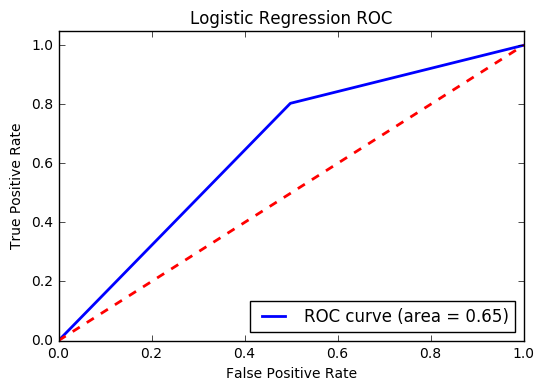

In [175]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='blue', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC')
plt.legend(loc="lower right")
plt.show()

### LOG INDIVIDUAL

In [141]:
logistic_model

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-05,
          verbose=0, warm_start=False)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.4)
logistic_model = lm.LogisticRegression(penalty = 'l2', C = 100, n_jobs = -1, tol = 1e-6)
logistic_model.fit(X_train, y_train)
train_accuracy = logistic_model.score(X_train, y_train)
test_accuracy = logistic_model.score(X_test, y_test)
print(train_accuracy)
print(test_accuracy)

0.660482645179
0.668040850745


### END LOGISTIC

### EXECUTE

In [462]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.4)

In [463]:
np.shape(X_train)

(48027L, 37L)

### SVM

In [176]:
from sklearn import svm

In [248]:
svm_model = svm.SVC(kernel = 'rbf', degree = 3, max_iter=1000, C = 10, shrinking = False, tol = 0.000001)
svm_model.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=1000, probability=False, random_state=None, shrinking=False,
  tol=1e-06, verbose=False)

In [244]:
train_accuracy = svm_model.score(X_train, y_train)
test_accuracy = svm_model.score(X_test, y_test)

In [245]:
test_accuracy

0.67294784675032304

In [246]:
1-test_accuracy

0.32705215324967696

In [151]:
n = 80046
test_k_accuracy = 0

true_neg = 0
true_pos = 0
false_neg = 0
false_pos = 0
num_folds = len(fold_indices) - 1
desired_num_folds = num_folds - 1

for i in range(desired_num_folds):
    subset1 = fold_indices[i]
    subset2 = fold_indices[i + 1]
    X_test = X_data[subset1:subset2]
    y_test = y_data[subset1:subset2]
    
    X_train = np.vstack((X_data[0:subset1], X_data[subset2:n]))
    y_train = np.hstack((y_data[0:subset1], y_data[subset2:n]))
    
    svm_model = svm.LinearSVC(penalty='l2', max_iter=1000, dual = False, C = 100, tol = 0.000001)
    svm_model.fit(X_train, y_train)
    
    train_accuracy = svm_model.predict(X_train)
    test_accuracy = svm_model.predict(X_test)
    
    test_len = len(test_accuracy)
    test_hat = np.zeros(test_len)
    for i in range(test_len):
        if test_accuracy[i] > 0.5:
            test_hat[i] = 1
        else:
            test_hat[i] = 0
            
        if test_hat[i] == 0 and y_test[i] == 0:
            true_neg += 1
        elif test_hat[i] == 1 and y_test[i] == 1:
            true_pos += 1
        elif test_hat[i] == 1 and y_test[i] == 0:
            false_pos += 1
        elif test_hat[i] == 0 and y_test[i] == 1:
            false_neg += 1
    
    num_correct = 0
    for i in range(len(test_accuracy)):
        if test_hat[i] == y_test[i]:
            num_correct += 1
            
    accuracy = float(num_correct) / test_len 
    
    test_k_accuracy += accuracy
    
test_k_accuracy /= desired_num_folds
print test_k_accuracy

0.660751220445


In [152]:
1 - test_k_accuracy

0.33924877955509924

In [153]:
print float(true_neg) / 9
print float(true_pos) / 9
print float(false_pos) / 9
print float(false_neg) / 9

3550.0
1741.22222222
959.222222222
1757.44444444


In [154]:
true_neg = 0
true_pos = 0
false_neg = 0
false_pos = 0

## TRUE test
i = 9
subset1 = fold_indices[i]
subset2 = fold_indices[i + 1]
X_test = X_data[subset1:subset2]
y_test = y_data[subset1:subset2]

X_train = np.vstack((X_data[0:subset1], X_data[subset2:n]))
y_train = np.hstack((y_data[0:subset1], y_data[subset2:n]))

svm_model.fit(X_train, y_train)

train_accuracy = svm_model.predict(X_train)
test_accuracy = svm_model.predict(X_test)

test_other = []
y_true_other = []

test_len = len(test_accuracy)
test_hat = np.zeros(test_len)
for i in range(test_len):
    if test_accuracy[i] > 0.5:
        test_hat[i] = 1
        test_other.append(0)
    else:
        test_hat[i] = 0
        test_other.append(1)

    if test_hat[i] == 0 and y_test[i] == 0:
        true_neg += 1
    elif test_hat[i] == 1 and y_test[i] == 1:
        true_pos += 1
    elif test_hat[i] == 1 and y_test[i] == 0:
        false_pos += 1
    elif test_hat[i] == 0 and y_test[i] == 1:
        false_neg += 1
        
    if y_test[i] == 0:
        y_true_other.append(1)
    elif y_test[i] == 1:
        y_true_other.append(0)

num_correct = 0
for i in range(len(test_accuracy)):
    if test_hat[i] == y_test[i]:
        num_correct += 1

accuracy = float(num_correct) / test_len 
print accuracy

0.667042889391


In [155]:
test_complete = np.vstack((test_accuracy, test_other)).T
test_complete_true = np.vstack((y_test, y_true_other)).T

In [156]:
1-accuracy

0.33295711060948086

In [157]:
print float(true_neg)
print float(true_pos)
print float(false_pos)
print float(false_neg)

3574.0
1745.0
902.0
1753.0


In [53]:
from sklearn.metrics import roc_curve, auc

In [159]:
y_score = svm_model.fit(X_train, y_train).decision_function(X_test)

In [160]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(test_complete_true[:, i], test_complete[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='chartreuse', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### New SVM

In [310]:
n = 80046
test_k_accuracy = 0
true_neg = 0
true_pos = 0
false_neg = 0
false_pos = 0
for i in range(len(fold_indices)-4):
    subset1 = fold_indices[i]
    subset2 = fold_indices[i + 1]
    X_test = X_data[subset1:subset2]
    y_test = y_data[subset1:subset2]
    
    X_train = np.vstack((X_data[0:subset1], X_data[subset2:n]))
    y_train = np.hstack((y_data[0:subset1], y_data[subset2:n]))
    
    svm_model = svm.LinearSVC(penalty='l1', max_iter=1000, dual = False, C = 100, tol = 0.000001)
    svm_model.fit(X_train, y_train)
    
    train_accuracy = svm_model.predict(X_train)
    test_accuracy = svm_model.predict(X_test)
    
    test_len = len(test_accuracy)
    test_hat = np.zeros(test_len)
    for i in range(test_len):
        if test_accuracy[i] > 0.5:
            test_hat[i] = 1
        else:
            test_hat[i] = 0
    
    num_correct = 0
    for i in range(len(test_accuracy)):
        if test_hat[i] == y_test[i]:
            num_correct += 1
            
        if test_hat[i] == 0 and y_test[i] == 0:
            true_neg += 1
        elif test_hat[i] == 1 and y_test[i] == 1:
            true_pos += 1
        elif test_hat[i] == 1 and y_test[i] == 0:
            false_pos += 1
        elif test_hat[i] == 0 and y_test[i] == 1:
            false_neg += 1
            
    accuracy = float(num_correct) / test_len 
    
    test_k_accuracy += accuracy
    
test_k_accuracy /= 7
print test_k_accuracy

0.667184841285


In [311]:
true_neg = 0
true_pos = 0
false_neg = 0
false_pos = 0

subset1 = fold_indices[0]
subset2 = fold_indices[7]

X_train = X_data[subset1:subset2]
y_train = y_data[subset1:subset2]

svm_model = svm.LinearSVC(penalty='l1', max_iter=1000, dual = False, C = 100, tol = 0.000001)
svm_model.fit(X_train, y_train)

LinearSVC(C=100, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=1e-06,
     verbose=0)

In [312]:
true_neg = 0
true_pos = 0
false_neg = 0
false_pos = 0

subset1 = fold_indices[7]
subset2 = fold_indices[10]
X_test = X_data[subset1:subset2]
y_test = y_data[subset1:subset2]

test_accuracy = svm_model.predict(X_test)
test_scores = svm_model.predict(X_test)

test_other = []
y_true_other = []

test_len = len(test_accuracy)
test_hat = np.zeros(test_len)
for i in range(test_len):
    if test_accuracy[i] > 0.5:
        test_hat[i] = 1
        test_other.append(0)
    else:
        test_hat[i] = 0
        test_other.append(1)

num_correct = 0
for i in range(len(test_accuracy)):
    if test_hat[i] == y_test[i]:
        num_correct += 1

    if test_hat[i] == 0 and y_test[i] == 0:
        true_neg += 1
    elif test_hat[i] == 1 and y_test[i] == 1:
        true_pos += 1
    elif test_hat[i] == 1 and y_test[i] == 0:
        false_pos += 1
    elif test_hat[i] == 0 and y_test[i] == 1:
        false_neg += 1
        
    if y_test[i] == 0:
        y_true_other.append(1)
    elif y_test[i] == 1:
        y_true_other.append(0)

accuracy = float(num_correct) / test_len
print accuracy

0.673156292992


In [313]:
test_complete = np.vstack((test_scores, test_other)).T
test_complete_true = np.vstack((y_test, y_true_other)).T
print float(true_neg)
print float(true_pos)
print float(false_pos)
print float(false_neg)
print 1-accuracy

11000.0
5147.0
2557.0
5283.0
0.326843707008


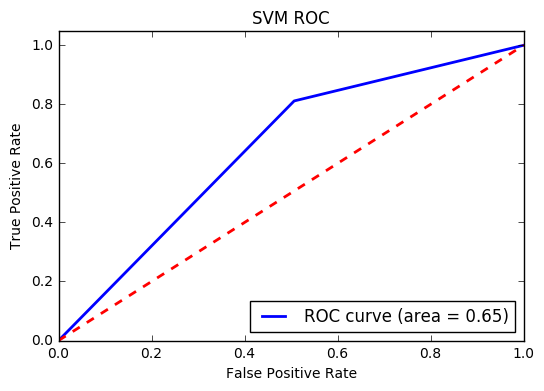

In [314]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(test_complete_true[:, i], test_complete[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
y_score = svm_model.fit(X_train, y_train).decision_function(X_test)
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='blue', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC')
plt.legend(loc="lower right")
plt.show()

### Neural Network

In [48]:
from sklearn.neural_network import MLPClassifier

In [45]:
neural_net_model = MLPClassifier(activation = 'logistic', solver='adam', alpha=1e-3, tol = 1e-7,
                    hidden_layer_sizes=(100, 5), random_state=1, learning_rate = 'invscaling',
                                 warm_start = False)
neural_net_model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [283]:
train_accuracy = neural_net_model.score(X_train, y_train)
test_accuracy = neural_net_model.score(X_test, y_test)
print(test_accuracy)

0.675615958644


In [284]:
1 - test_accuracy

0.3243840413557344

In [47]:
n = 80046
test_k_accuracy = 0

true_neg = 0
true_pos = 0
false_neg = 0
false_pos = 0
num_folds = len(fold_indices) - 1
desired_num_folds = num_folds - 1

for i in range(desired_num_folds):
    subset1 = fold_indices[i]
    subset2 = fold_indices[i + 1]
    X_test = X_data[subset1:subset2]
    y_test = y_data[subset1:subset2]
    
    X_train = np.vstack((X_data[0:subset1], X_data[subset2:n]))
    y_train = np.hstack((y_data[0:subset1], y_data[subset2:n]))
    
    neural_net_model = MLPClassifier(activation = 'logistic', solver='adam', alpha=1e-3, tol = 1e-7,
                    hidden_layer_sizes=(50, 5), random_state=1, learning_rate = 'invscaling',
                                 warm_start = False)
    neural_net_model.fit(X_train, y_train)

    train_accuracy = mlp_model.predict(X_train)
    test_accuracy = mlp_model.predict(X_test)
    
    test_len = len(test_accuracy)
    test_hat = np.zeros(test_len)
    for i in range(test_len):
        if test_accuracy[i] > 0.5:
            test_hat[i] = 1
        else:
            test_hat[i] = 0
            
        if test_hat[i] == 0 and y_test[i] == 0:
            true_neg += 1
        elif test_hat[i] == 1 and y_test[i] == 1:
            true_pos += 1
        elif test_hat[i] == 1 and y_test[i] == 0:
            false_pos += 1
        elif test_hat[i] == 0 and y_test[i] == 1:
            false_neg += 1
    
    num_correct = 0
    for i in range(len(test_accuracy)):
        if test_hat[i] == y_test[i]:
            num_correct += 1
            
    accuracy = float(num_correct) / test_len 
    
    test_k_accuracy += accuracy
    
test_k_accuracy /= desired_num_folds
print test_k_accuracy

NameError: name 'mlp_model' is not defined

In [132]:
from sklearn.neural_network import MLPClassifier

## NEW NEURAL

In [133]:
n = 80046
test_k_accuracy = 0
true_neg = 0
true_pos = 0
false_neg = 0
false_pos = 0
for i in range(len(fold_indices)-4):
    subset1 = fold_indices[i]
    subset2 = fold_indices[i + 1]
    X_test = X_data[subset1:subset2]
    y_test = y_data[subset1:subset2]
    
    X_train = np.vstack((X_data[0:subset1], X_data[subset2:n]))
    y_train = np.hstack((y_data[0:subset1], y_data[subset2:n]))
    
    neural_net_model = MLPClassifier(activation = 'logistic', solver='adam', alpha=1e-3, tol = 1e-7,
                    hidden_layer_sizes=(5, 2), learning_rate = 'invscaling',
                                 warm_start = False)
    neural_net_model.fit(X_train, y_train)
    
    train_accuracy = neural_net_model.predict_proba(X_train)
    test_accuracy = neural_net_model.predict_proba(X_test)
    
    test_len = len(test_accuracy)
    test_hat = np.zeros(test_len)
    for i in range(test_len):
        if test_accuracy[i, 1] > 0.5:
            test_hat[i] = 1
        else:
            test_hat[i] = 0
    
    num_correct = 0
    for i in range(len(test_accuracy)):
        if test_hat[i] == y_test[i]:
            num_correct += 1
            
        if test_hat[i] == 0 and y_test[i] == 0:
            true_neg += 1
        elif test_hat[i] == 1 and y_test[i] == 1:
            true_pos += 1
        elif test_hat[i] == 1 and y_test[i] == 0:
            false_pos += 1
        elif test_hat[i] == 0 and y_test[i] == 1:
            false_neg += 1
            
    accuracy = float(num_correct) / test_len 
    
    test_k_accuracy += accuracy
    
test_k_accuracy /= 7
print test_k_accuracy

0.672821821436


## Neural Train

In [134]:
true_neg = 0
true_pos = 0
false_neg = 0
false_pos = 0

subset1 = fold_indices[0]
subset2 = fold_indices[7]

X_train = X_data[subset1:subset2]
y_train = y_data[subset1:subset2]

neural_net_model = MLPClassifier(activation = 'logistic', solver='adam', alpha=1e-3, tol = 1e-7,
                    hidden_layer_sizes=(50, 5), learning_rate = 'invscaling',
                                 warm_start = False)
neural_net_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 5), learning_rate='invscaling',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=1e-07, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [135]:
true_neg = 0
true_pos = 0
false_neg = 0
false_pos = 0

subset1 = fold_indices[7]
subset2 = fold_indices[10]
X_test = X_data[subset1:subset2]
y_test = y_data[subset1:subset2]

test_accuracy = neural_net_model.predict_proba(X_test)
test_scores = neural_net_model.predict(X_test)

test_other = []
y_true_other = []

test_len = len(test_accuracy)
test_hat = np.zeros(test_len)
for i in range(test_len):
    if test_accuracy[i, 1] > 0.5:
        test_hat[i] = 1
        test_other.append(0)
    else:
        test_hat[i] = 0
        test_other.append(1)

num_correct = 0
for i in range(len(test_accuracy)):
    if test_hat[i] == y_test[i]:
        num_correct += 1

    if test_hat[i] == 0 and y_test[i] == 0:
        true_neg += 1
    elif test_hat[i] == 1 and y_test[i] == 1:
        true_pos += 1
    elif test_hat[i] == 1 and y_test[i] == 0:
        false_pos += 1
    elif test_hat[i] == 0 and y_test[i] == 1:
        false_neg += 1
        
    if y_test[i] == 0:
        y_true_other.append(1)
    elif y_test[i] == 1:
        y_true_other.append(0)

accuracy = float(num_correct) / test_len
print accuracy

0.682744820111


In [136]:
test_complete = np.vstack((test_scores, test_other)).T
test_complete_true = np.vstack((y_test, y_true_other)).T
print float(true_neg)
print float(true_pos)
print float(false_pos)
print float(false_neg)
print 1-accuracy

11280.0
5097.0
2277.0
5333.0
0.317255179889


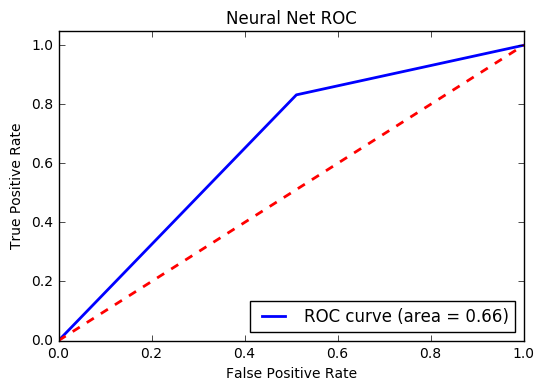

In [137]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(test_complete_true[:, i], test_complete[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
#y_score = neural_net_model.fit(X_train, y_train).decision_function(X_test)
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), test_scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='blue', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Neural Net ROC')
plt.legend(loc="lower right")
plt.show()

# BAGGING

In [53]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [154]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
n_val = 100
bagging_model = BaggingClassifier(base_estimator=RandomForestClassifier(min_samples_leaf=100, 
                                             n_estimators=100,
                                            n_jobs=-1,
                                            criterion='gini',
                                            bootstrap=False), n_estimators = n_val)
bagging_model.fit(X_train, y_train)
train_accuracy = bagging_model.score(X_train, y_train)
test_accuracy = bagging_model.score(X_test, y_test)
test_accuracy
print 1 - test_accuracy

0.323591945637


### START Bagging

In [ ]:
n = 80046
test_k_accuracy = 0
true_neg = 0
true_pos = 0
false_neg = 0
false_pos = 0
for i in range(len(fold_indices)-4):
    subset1 = fold_indices[i]
    subset2 = fold_indices[i + 1]
    X_test = X_data[subset1:subset2]
    y_test = y_data[subset1:subset2]
    
    X_train = np.vstack((X_data[0:subset1], X_data[subset2:n]))
    y_train = np.hstack((y_data[0:subset1], y_data[subset2:n]))
    
    bagging_model = BaggingClassifier(MLPClassifier(activation = 'logistic', solver='adam', alpha=1e-3, tol = 1e-7,
                    hidden_layer_sizes=(5, 2), random_state=1, learning_rate = 'invscaling',
                                 warm_start = False))
    bagging_model.fit(X_train, y_train)

    train_accuracy = bagging_model.predict_proba(X_train)
    test_accuracy = bagging_model.predict_proba(X_test)
    
    test_len = len(test_accuracy)
    test_hat = np.zeros(test_len)
    for i in range(test_len):
        if test_accuracy[i, 1] > 0.5:
            test_hat[i] = 1
        else:
            test_hat[i] = 0
    
    num_correct = 0
    for i in range(len(test_accuracy)):
        if test_hat[i] == y_test[i]:
            num_correct += 1
            
        if test_hat[i] == 0 and y_test[i] == 0:
            true_neg += 1
        elif test_hat[i] == 1 and y_test[i] == 1:
            true_pos += 1
        elif test_hat[i] == 1 and y_test[i] == 0:
            false_pos += 1
        elif test_hat[i] == 0 and y_test[i] == 1:
            false_neg += 1
            
    accuracy = float(num_correct) / test_len 
    
    test_k_accuracy += accuracy
    
test_k_accuracy /= 7
print test_k_accuracy

In [ ]:
true_neg = 0
true_pos = 0
false_neg = 0
false_pos = 0

subset1 = fold_indices[0]
subset2 = fold_indices[7]

X_train = X_data[subset1:subset2]
y_train = y_data[subset1:subset2]

bagging_model = BaggingClassifier(MLPClassifier(activation = 'logistic', solver='adam', alpha=1e-3, tol = 1e-7,
                    hidden_layer_sizes=(5, 2), random_state=1, learning_rate = 'invscaling',
                                 warm_start = False))
bagging_model.fit(X_train, y_train)

In [ ]:
true_neg = 0
true_pos = 0
false_neg = 0
false_pos = 0

subset1 = fold_indices[7]
subset2 = fold_indices[10]
X_test = X_data[subset1:subset2]
y_test = y_data[subset1:subset2]

test_accuracy = bagging_model.predict_proba(X_test)
test_scores = bagging_model.predict(X_test)

test_other = []
y_true_other = []

test_len = len(test_accuracy)
test_hat = np.zeros(test_len)
for i in range(test_len):
    if test_accuracy[i, 1] > 0.5:
        test_hat[i] = 1
        test_other.append(0)
    else:
        test_hat[i] = 0
        test_other.append(1)

num_correct = 0
for i in range(len(test_accuracy)):
    if test_hat[i] == y_test[i]:
        num_correct += 1

    if test_hat[i] == 0 and y_test[i] == 0:
        true_neg += 1
    elif test_hat[i] == 1 and y_test[i] == 1:
        true_pos += 1
    elif test_hat[i] == 1 and y_test[i] == 0:
        false_pos += 1
    elif test_hat[i] == 0 and y_test[i] == 1:
        false_neg += 1
        
    if y_test[i] == 0:
        y_true_other.append(1)
    elif y_test[i] == 1:
        y_true_other.append(0)

accuracy = float(num_correct) / test_len
print accuracy

In [ ]:
test_complete = np.vstack((test_scores, test_other)).T
test_complete_true = np.vstack((y_test, y_true_other)).T
print float(true_neg)
print float(true_pos)
print float(false_pos)
print float(false_neg)
print 1-accuracy

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(test_complete_true[:, i], test_complete[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
#y_score = neural_net_model.fit(X_train, y_train).decision_function(X_test)
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), test_scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='blue', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bagging ROC')
plt.legend(loc="lower right")
plt.show()

# RANDOM FOREST

In [54]:
import time

In [55]:
start = time.time()
random_forest_model = RandomForestClassifier(min_samples_leaf=100, 
                                             n_estimators=100,
                                            n_jobs=-1,
                                            criterion='gini',
                                            bootstrap=False)
random_forest_model.fit(X_train, y_train)
end = time.time()

In [56]:
print end - start

3.80899977684


In [57]:
start = time.time()
train_accuracy = random_forest_model.score(X_train, y_train)
test_accuracy = random_forest_model.score(X_test, y_test)
end = time.time()

In [58]:
test_accuracy

0.66491819657799422

In [59]:
random_forest_model.feature_importances_ 

array([  8.20111107e-03,   3.24185027e-03,   7.81637469e-04,
         1.77584599e-04,   1.48037012e-04,   7.84929481e-04,
         1.50871021e-03,   3.62245766e-03,   1.21689614e-03,
         1.38233650e-04,   3.58604428e-03,   2.11042891e-02,
         2.74751052e-03,   6.31564831e-04,   2.79561457e-04,
         1.49838330e-04,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   6.72940304e-03,
         7.83705717e-02,   2.13558309e-01,   5.82023711e-02,
         1.62295135e-02,   4.35361111e-02,   1.09340410e-01,
         1.93966312e-02,   6.38413755e-03,   9.04537700e-03,
         2.36563467e-02,   7.79806023e-03,   6.33406648e-03,
         1.16864120e-02,   1.00724044e-02,   5.66925999e-03,
         5.28728692e-03,   3.72691456e-03,   1.55981537e-02,
         6.59470483e-04,   3.00400097e-03,   9.25734481e-03,
         4.36926549e-04,   8.51832531e-03,   6.99391563e-03,
         4.72686235e-03,   2.75019918e-02,   2.89239254e-03,
         6.53949067e-03,

In [330]:
1-test_accuracy

0.32588485429607705

### START

In [86]:
n = 80046
test_k_accuracy = 0
true_neg = 0
true_pos = 0
false_neg = 0
false_pos = 0
for i in range(len(fold_indices)-4):
    subset1 = fold_indices[i]
    subset2 = fold_indices[i + 1]
    X_test = X_data[subset1:subset2]
    y_test = y_data[subset1:subset2]
    
    X_train = np.vstack((X_data[0:subset1], X_data[subset2:n]))
    y_train = np.hstack((y_data[0:subset1], y_data[subset2:n]))
    
    random_forest_model = RandomForestClassifier(min_samples_leaf=100, max_features = None,
                                             n_estimators=100,
                                            n_jobs=-1,
                                            criterion='gini',
                                            bootstrap=True)
    random_forest_model.fit(X_train, y_train)

    train_accuracy = random_forest_model.predict_proba(X_train)
    test_accuracy = random_forest_model.predict_proba(X_test)
    
    test_len = len(test_accuracy)
    test_hat = np.zeros(test_len)
    for i in range(test_len):
        if test_accuracy[i, 1] > 0.5:
            test_hat[i] = 1
        else:
            test_hat[i] = 0
    
    num_correct = 0
    for i in range(len(test_accuracy)):
        if test_hat[i] == y_test[i]:
            num_correct += 1
            
        if test_hat[i] == 0 and y_test[i] == 0:
            true_neg += 1
        elif test_hat[i] == 1 and y_test[i] == 1:
            true_pos += 1
        elif test_hat[i] == 1 and y_test[i] == 0:
            false_pos += 1
        elif test_hat[i] == 0 and y_test[i] == 1:
            false_neg += 1
            
    accuracy = float(num_correct) / test_len 
    
    test_k_accuracy += accuracy
    
test_k_accuracy /= 7
print test_k_accuracy

0.674426964688


In [87]:
1-test_k_accuracy

0.32557303531157467

In [102]:
true_neg = 0
true_pos = 0
false_neg = 0
false_pos = 0

subset1 = fold_indices[0]
subset2 = fold_indices[7]

X_train = X_data[subset1:subset2]
y_train = y_data[subset1:subset2]

random_forest_model = RandomForestClassifier(min_samples_leaf=100, max_features = None,
                                             n_estimators=100,
                                            n_jobs=-1,
                                            criterion='gini',
                                            bootstrap=True)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=100,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [103]:
random_forest_model.feature_importances_ 

array([  1.96381417e-03,   6.78638756e-04,   2.46284429e-04,
         1.88114083e-04,   7.14306055e-05,   4.82878590e-04,
         1.61870104e-04,   5.90279231e-04,   2.16258915e-05,
         0.00000000e+00,   2.76779232e-03,   2.61080770e-02,
         2.02697519e-03,   3.64565474e-04,   6.96069899e-05,
         5.50166147e-05,   1.26637640e-05,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   3.06196450e-03,
         4.57458219e-02,   4.03989107e-01,   2.60811631e-02,
         1.17901308e-02,   1.24819476e-02,   1.06392513e-01,
         8.27065102e-03,   1.39339760e-02,   8.67054594e-03,
         6.97701955e-03,   3.77711849e-03,   5.10824765e-03,
         7.31390978e-03,   7.94707861e-03,   4.30587542e-03,
         5.37725333e-03,   4.43176624e-03,   5.24658024e-03,
         6.20487008e-04,   5.01059866e-03,   4.21668974e-03,
         2.18929051e-05,   1.06158218e-02,   7.55213280e-03,
         5.34223029e-03,   9.83112880e-03,   1.02075818e-03,
         7.63935515e-03,

In [104]:
strs = [rank1, rank2, rank3, rank4, rank5, rank6, rank7, rank8, rank9, rank10, count, query_lengths_1, query_lengths_2, query_lengths_3, query_lengths_4, query_lengths_5, query_lengths_6, query_lengths_7, query_lengths_8, query_lengths_large, is_homepage, sig1, sig2, sig3, sig4, sig5, sig6, sig7, sig8, avg_sig1, avg_sig2, avg_sig3, avg_sig4, avg_sig5, avg_sig6, avg_sig7, avg_sig8, sig1_0, sig2_0, sig3_0, sig4_0, sig5_0, sig6_0, sig7_0, sig8_0, sig1_25, sig2_25, sig3_25, sig4_25, sig5_25, sig6_25, sig7_25, sig8_25, sig1_50, sig2_50, sig3_50, sig4_50, sig5_50, sig6_50, sig7_50, sig8_50, sig1_75, sig2_75, sig3_75, sig4_75, sig5_75, sig6_75, sig7_75, sig8_75, sig1_100, sig2_100, sig3_100, sig4_100, sig5_100, sig6_100, sig7_100, sig8_100]

In [105]:
true_neg = 0
true_pos = 0
false_neg = 0
false_pos = 0

subset1 = fold_indices[7]
subset2 = fold_indices[10]
X_test = X_data[subset1:subset2]
y_test = y_data[subset1:subset2]

test_accuracy = random_forest_model.predict_proba(X_test)
test_scores = random_forest_model.predict(X_test)

test_other = []
y_true_other = []

test_len = len(test_accuracy)
test_hat = np.zeros(test_len)
for i in range(test_len):
    if test_accuracy[i, 1] > 0.5:
        test_hat[i] = 1
        test_other.append(0)
    else:
        test_hat[i] = 0
        test_other.append(1)

num_correct = 0
for i in range(len(test_accuracy)):
    if test_hat[i] == y_test[i]:
        num_correct += 1

    if test_hat[i] == 0 and y_test[i] == 0:
        true_neg += 1
    elif test_hat[i] == 1 and y_test[i] == 1:
        true_pos += 1
    elif test_hat[i] == 1 and y_test[i] == 0:
        false_pos += 1
    elif test_hat[i] == 0 and y_test[i] == 1:
        false_neg += 1
        
    if y_test[i] == 0:
        y_true_other.append(1)
    elif y_test[i] == 1:
        y_true_other.append(0)

accuracy = float(num_correct) / test_len
print accuracy

0.677408596323


In [106]:
test_complete = np.vstack((test_scores, test_other)).T
test_complete_true = np.vstack((y_test, y_true_other)).T
print float(true_neg)
print float(true_pos)
print float(false_pos)
print float(false_neg)
print 1-accuracy

11050.0
5199.0
2507.0
5231.0
0.322591403677


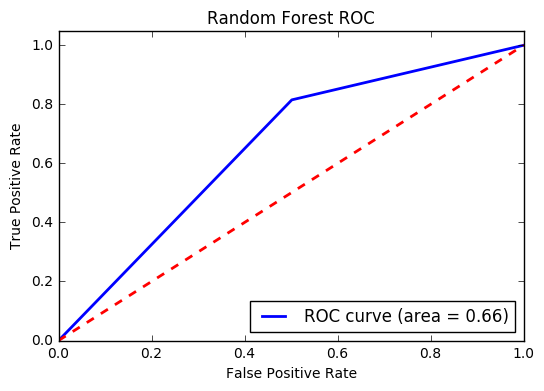

In [107]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(test_complete_true[:, i], test_complete[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
#y_score = neural_net_model.fit(X_train, y_train).decision_function(X_test)
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), test_scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='blue', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC')
plt.legend(loc="lower right")
plt.show()

# LDA

In [293]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [294]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [212]:
train_accuracy = lda_model.score(X_train, y_train)
test_accuracy = lda_model.score(X_test, y_test)
print(test_accuracy)

0.672989535999


In [213]:
n = 80046
test_k_accuracy = 0

true_neg = 0
true_pos = 0
false_neg = 0
false_pos = 0

for i in range(len(fold_indices)-1):
    subset1 = fold_indices[i]
    subset2 = fold_indices[i + 1]
    X_test = X_data[subset1:subset2]
    y_test = y_data[subset1:subset2]
    
    X_train = np.vstack((X_data[0:subset1], X_data[subset2:n]))
    y_train = np.hstack((y_data[0:subset1], y_data[subset2:n]))
    
    lda_model = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage = 'auto', tol=1e-6)
    lda_model.fit(X_train, y_train)
    
    train_accuracy = lda_model.predict_proba(X_train)
    test_accuracy = lda_model.predict_proba(X_test)
    
    test_len = len(test_accuracy)
    test_hat = np.zeros(test_len)
    for i in range(test_len):
        if test_accuracy[i, 1] > 0.5:
            test_hat[i] = 1
        else:
            test_hat[i] = 0
            
        if test_hat[i] == 0 and y_test[i] == 0:
            true_neg += 1
        elif test_hat[i] == 1 and y_test[i] == 1:
            true_pos += 1
        elif test_hat[i] == 1 and y_test[i] == 0:
            false_pos += 1
        elif test_hat[i] == 0 and y_test[i] == 1:
            false_neg += 1
    
    num_correct = 0
    for i in range(len(test_accuracy)):
        if test_hat[i] == y_test[i]:
            num_correct += 1
            
    accuracy = float(num_correct) / test_len 
    
    test_k_accuracy += accuracy
    
test_k_accuracy /= 10
print test_k_accuracy

0.66894941821


In [825]:
print float(true_neg) / 10
print float(true_pos) / 10
print float(false_pos) / 10
print float(false_neg) / 10

3573.3
1750.2
932.6
1748.4


### Start here

In [305]:
n = 80046
test_k_accuracy = 0
true_neg = 0
true_pos = 0
false_neg = 0
false_pos = 0
for i in range(len(fold_indices)-4):
    subset1 = fold_indices[i]
    subset2 = fold_indices[i + 1]
    X_test = X_data[subset1:subset2]
    y_test = y_data[subset1:subset2]
    
    X_train = np.vstack((X_data[0:subset1], X_data[subset2:n]))
    y_train = np.hstack((y_data[0:subset1], y_data[subset2:n]))
    
    lda_model = LinearDiscriminantAnalysis()
    lda_model.fit(X_train, y_train)
    
    train_accuracy = lda_model.predict_proba(X_train)
    test_accuracy = lda_model.predict_proba(X_test)
    
    test_len = len(test_accuracy)
    test_hat = np.zeros(test_len)
    for i in range(test_len):
        if test_accuracy[i, 1] > 0.5:
            test_hat[i] = 1
        else:
            test_hat[i] = 0
    
    num_correct = 0
    for i in range(len(test_accuracy)):
        if test_hat[i] == y_test[i]:
            num_correct += 1
            
        if test_hat[i] == 0 and y_test[i] == 0:
            true_neg += 1
        elif test_hat[i] == 1 and y_test[i] == 1:
            true_pos += 1
        elif test_hat[i] == 1 and y_test[i] == 0:
            false_pos += 1
        elif test_hat[i] == 0 and y_test[i] == 1:
            false_neg += 1
            
    accuracy = float(num_correct) / test_len 
    
    test_k_accuracy += accuracy
    
test_k_accuracy /= 7
print test_k_accuracy

0.667238169854


In [306]:
true_neg = 0
true_pos = 0
false_neg = 0
false_pos = 0

subset1 = fold_indices[0]
subset2 = fold_indices[7]

X_train = X_data[subset1:subset2]
y_train = y_data[subset1:subset2]

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [307]:
true_neg = 0
true_pos = 0
false_neg = 0
false_pos = 0

subset1 = fold_indices[7]
subset2 = fold_indices[10]
X_test = X_data[subset1:subset2]
y_test = y_data[subset1:subset2]

test_accuracy = lda_model.predict_proba(X_test)
test_scores = lda_model.predict(X_test)

test_other = []
y_true_other = []

test_len = len(test_accuracy)
test_hat = np.zeros(test_len)
for i in range(test_len):
    if test_accuracy[i, 1] > 0.5:
        test_hat[i] = 1
        test_other.append(0)
    else:
        test_hat[i] = 0
        test_other.append(1)

num_correct = 0
for i in range(len(test_accuracy)):
    if test_hat[i] == y_test[i]:
        num_correct += 1

    if test_hat[i] == 0 and y_test[i] == 0:
        true_neg += 1
    elif test_hat[i] == 1 and y_test[i] == 1:
        true_pos += 1
    elif test_hat[i] == 1 and y_test[i] == 0:
        false_pos += 1
    elif test_hat[i] == 0 and y_test[i] == 1:
        false_neg += 1
        
    if y_test[i] == 0:
        y_true_other.append(1)
    elif y_test[i] == 1:
        y_true_other.append(0)

accuracy = float(num_correct) / test_len
print accuracy

0.672989535999


In [308]:
test_complete = np.vstack((test_scores, test_other)).T
test_complete_true = np.vstack((y_test, y_true_other)).T
print float(true_neg)
print float(true_pos)
print float(false_pos)
print float(false_neg)
print 1-accuracy

11000.0
5143.0
2557.0
5287.0
0.327010464001


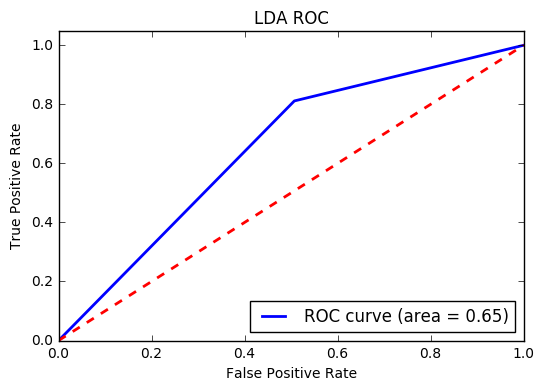

In [309]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(test_complete_true[:, i], test_complete[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
y_score = lda_model.fit(X_train, y_train).decision_function(X_test)
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='blue', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LDA ROC')
plt.legend(loc="lower right")
plt.show()

# ADABOOST

In [116]:
from sklearn.ensemble import AdaBoostClassifier

In [117]:
adaboost_model = AdaBoostClassifier(RandomForestClassifier(min_samples_leaf=100, 
                                             n_estimators=10,
                                            n_jobs=-1,
                                            criterion='gini',
                                            bootstrap=False))
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=100,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [118]:
train_accuracy = adaboost_model.score(X_train, y_train)
test_accuracy = adaboost_model.score(X_test, y_test)
print(test_accuracy)

0.672155751032


In [119]:
1-test_accuracy

0.32784424896819109

### START

In [120]:
n = 80046
test_k_accuracy = 0
true_neg = 0
true_pos = 0
false_neg = 0
false_pos = 0
for i in range(len(fold_indices)-4):
    subset1 = fold_indices[i]
    subset2 = fold_indices[i + 1]
    X_test = X_data[subset1:subset2]
    y_test = y_data[subset1:subset2]
    
    X_train = np.vstack((X_data[0:subset1], X_data[subset2:n]))
    y_train = np.hstack((y_data[0:subset1], y_data[subset2:n]))
    
    adaboost_model = AdaBoostClassifier(RandomForestClassifier(min_samples_leaf=100, 
                                             n_estimators=10,
                                            n_jobs=-1,
                                            criterion='gini',
                                            bootstrap=False))
    adaboost_model.fit(X_train, y_train)
    
    train_accuracy = adaboost_model.predict_proba(X_train)
    test_accuracy = adaboost_model.predict_proba(X_test)
    
    test_len = len(test_accuracy)
    test_hat = np.zeros(test_len)
    for i in range(test_len):
        if test_accuracy[i, 1] > 0.5:
            test_hat[i] = 1
        else:
            test_hat[i] = 0
    
    num_correct = 0
    for i in range(len(test_accuracy)):
        if test_hat[i] == y_test[i]:
            num_correct += 1
            
        if test_hat[i] == 0 and y_test[i] == 0:
            true_neg += 1
        elif test_hat[i] == 1 and y_test[i] == 1:
            true_pos += 1
        elif test_hat[i] == 1 and y_test[i] == 0:
            false_pos += 1
        elif test_hat[i] == 0 and y_test[i] == 1:
            false_neg += 1
            
    accuracy = float(num_correct) / test_len 
    
    test_k_accuracy += accuracy
    
test_k_accuracy /= 7
print test_k_accuracy

0.672517742273


In [121]:
true_neg = 0
true_pos = 0
false_neg = 0
false_pos = 0

subset1 = fold_indices[0]
subset2 = fold_indices[7]

X_train = X_data[subset1:subset2]
y_train = y_data[subset1:subset2]

adaboost_model = AdaBoostClassifier(RandomForestClassifier(min_samples_leaf=100, 
                                             n_estimators=10,
                                            n_jobs=-1,
                                            criterion='gini',
                                            bootstrap=False))
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=100,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [122]:
true_neg = 0
true_pos = 0
false_neg = 0
false_pos = 0

subset1 = fold_indices[7]
subset2 = fold_indices[10]
X_test = X_data[subset1:subset2]
y_test = y_data[subset1:subset2]

test_accuracy = adaboost_model.predict_proba(X_test)
test_scores = adaboost_model.predict(X_test)

test_other = []
y_true_other = []

test_len = len(test_accuracy)
test_hat = np.zeros(test_len)
for i in range(test_len):
    if test_accuracy[i, 1] > 0.5:
        test_hat[i] = 1
        test_other.append(0)
    else:
        test_hat[i] = 0
        test_other.append(1)

num_correct = 0
for i in range(len(test_accuracy)):
    if test_hat[i] == y_test[i]:
        num_correct += 1

    if test_hat[i] == 0 and y_test[i] == 0:
        true_neg += 1
    elif test_hat[i] == 1 and y_test[i] == 1:
        true_pos += 1
    elif test_hat[i] == 1 and y_test[i] == 0:
        false_pos += 1
    elif test_hat[i] == 0 and y_test[i] == 1:
        false_neg += 1
        
    if y_test[i] == 0:
        y_true_other.append(1)
    elif y_test[i] == 1:
        y_true_other.append(0)

accuracy = float(num_correct) / test_len
print accuracy

0.674281902697


In [123]:
test_complete = np.vstack((test_scores, test_other)).T
test_complete_true = np.vstack((y_test, y_true_other)).T
print float(true_neg)
print float(true_pos)
print float(false_pos)
print float(false_neg)
print 1-accuracy

10524.0
5650.0
3033.0
4780.0
0.325718097303


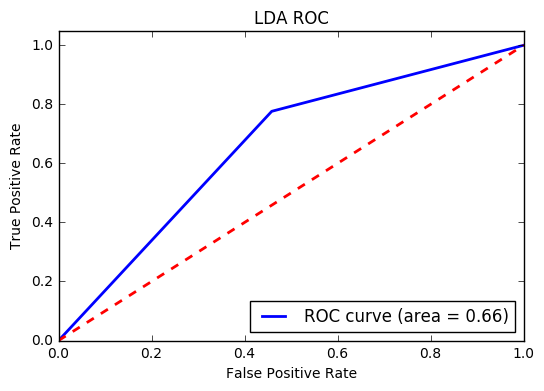

In [125]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(test_complete_true[:, i], test_complete[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
#y_score = lda_model.fit(X_train, y_train).decision_function(X_test)
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), test_scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='blue', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LDA ROC')
plt.legend(loc="lower right")
plt.show()

In [126]:
from sklearn.ensemble import VotingClassifier

In [141]:
eclf1 = VotingClassifier(estimators=[('neur', neural_net_model), ('ada', adaboost_model), ], voting='soft')
eclf1.fit(X_train, y_train)

VotingClassifier(estimators=[('neur', MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 5), learning_rate='invscaling',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs...    verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None))],
         n_jobs=1, voting='soft', weights=None)

In [142]:
train_accuracy = eclf1.score(X_train, y_train)
test_accuracy = eclf1.score(X_test, y_test)
print(test_accuracy)

0.684704214783


In [143]:
1-test_accuracy

0.31529578521699253

In [129]:
from sklearn.neighbors import KNeighborsClassifier

In [149]:
neigh = KNeighborsClassifier(n_neighbors=100, n_jobs = -1)
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=100, p=2,
           weights='uniform')

In [150]:
train_accuracy = neigh.score(X_train, y_train)
test_accuracy = neigh.score(X_test, y_test)
print(test_accuracy)

0.635761037228


In [151]:
print 1-test_accuracy

0.364238962772
